# Movie Rating Prediction With Python
* Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
* The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
* Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

Dataset: [dataset.csv](https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies)

# Loading and Exploring the Dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import pandas as pd

# Load the CSV file
path = '/content/drive/MyDrive/CodSoft/Task 2/Movie-Dataset.csv'
df = pd.read_csv(path, encoding='latin1')

In [10]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [11]:
df.shape

(15509, 10)

In [12]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [14]:
df.duplicated().sum()

6

# Data Cleaning

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(5659, 10)

In [17]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(5659, 10)

In [20]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

# Data Pre-Processing

In [21]:
df['Year']=df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [22]:
df['Duration']=pd.to_numeric(df['Duration'].str.replace(' min', ''))

In [23]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

<ipython-input-23-90fa2c7fd913>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [24]:
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


In [26]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


# Data Visualization

# Libraries

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Probability Density

In [28]:
year = px.histogram(df, x = 'Year', histnorm='probability density', nbins = 30)
year.show()

# Ratings Per Years

In [ ]:
rating_sum = df.groupby('Year')['Rating'].sum().reset_index()

fig = px.line(rating_sum, x='Year', y='Rating', title='Ratings Per Years')
fig.update_traces(mode='lines+markers', marker=dict(color='red'))
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(1920, 2025, 5))),
    yaxis=dict(tickmode='array', tickvals=list(range(0, 3000, 400))),
    xaxis_title='Years',
    yaxis_title='Ratings',
    title=dict(text='Ratings Per Years', x=0.5),
    showlegend=False
)

fig.show()

# Average Ratings Per Years

In [ ]:
rating_avg = df.groupby('Year')['Rating'].mean().reset_index()

fig = px.line(rating_avg, x='Year', y='Rating', title='Average Ratings Per Years')
fig.update_traces(mode='lines+markers', marker=dict(color='red'))
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(1920, 2025, 5))),
    yaxis=dict(tickmode='array', tickvals=[round(i, 1) for i in list(range(4, 9))]),
    xaxis_title='Years',
    yaxis_title='Average Ratings',
    title=dict(text='Average Ratings Per Years', x=0.5),
    showlegend=False
)

fig.show()

# Count of Movies

<ipython-input-25-780011744fb6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




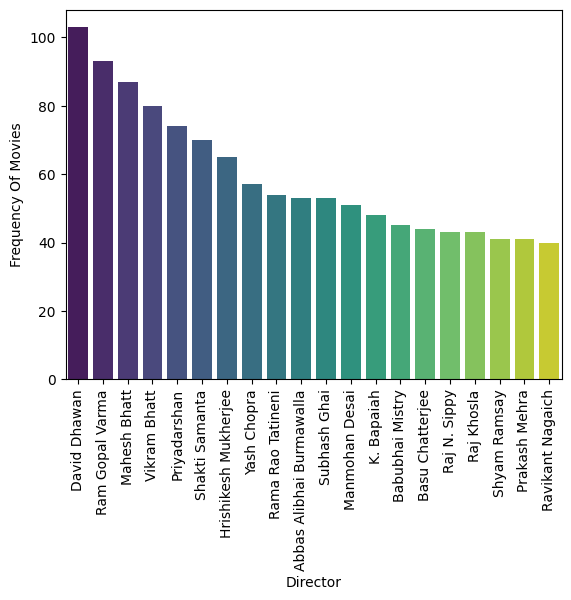

In [ ]:
top_20 = df.groupby('Director')['Name'].count().sort_values(ascending=False)[:20]

sns.barplot(x=top_20.index, y=top_20.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Frequency Of Movies')
plt.xlabel('Director')
plt.show()

# Duration Vs Rating

Correlation Of Duration And Rating is 0.03312751805616087


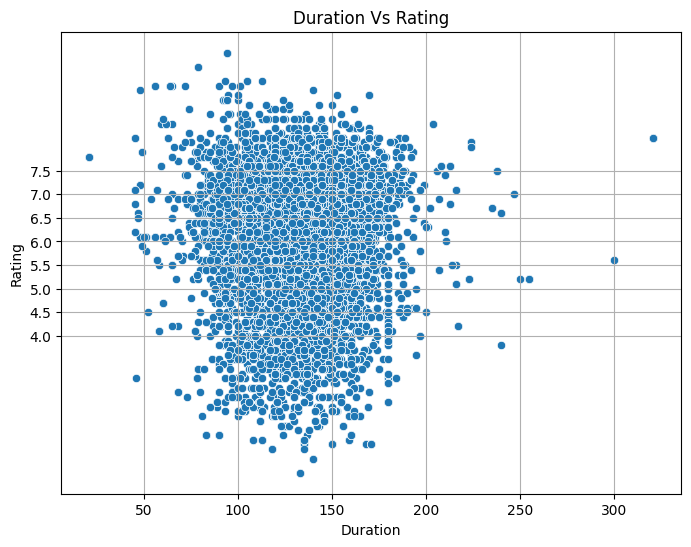

In [ ]:
corr_leng_rat = df['Duration'].corr(df['Rating'])
print(f"Correlation Of Duration And Rating is {corr_leng_rat}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration', y='Rating', data=df)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Duration Vs Rating')
plt.yticks(np.arange(4, 8, 0.5))
plt.grid(True)
plt.show()

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


# Data Cleaning

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


# BoxPlot

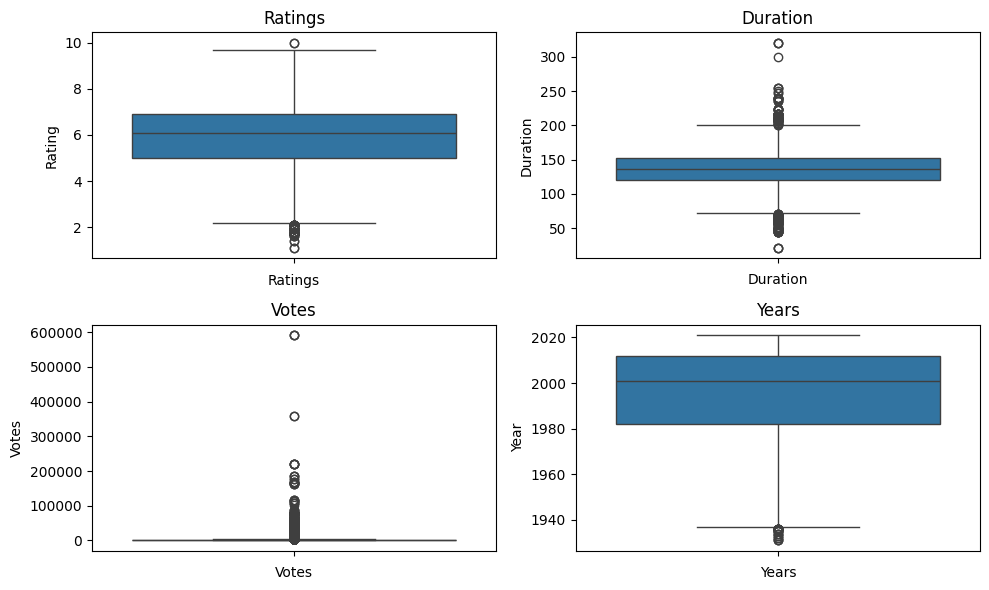

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,6))

sns.boxplot(data=df,y='Rating',ax=ax[0][0])
ax[0][0].set_title('Ratings')
ax[0][0].set_xlabel('Ratings')

sns.boxplot(data=df,y='Duration',ax=ax[0][1])
ax[0][1].set_title('Duration')
ax[0][1].set_xlabel('Duration')

sns.boxplot(data=df,y='Votes',ax=ax[1][0])
ax[1][0].set_title('Votes')
ax[1][0].set_xlabel('Votes')

sns.boxplot(data=df,y='Year',ax=ax[1][1])
ax[1][1].set_title('Years')
ax[1][1].set_xlabel('Years')

plt.tight_layout()

plt.show()

# Data Pre-Processing

In [ ]:
def out(df,col,dis):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-(iqr*dis)
    upper=q3+(iqr*dis)
    return lower,upper

In [ ]:
votes_low,votes_up=out(df,'Votes',1.5)

In [ ]:
vote_out_count=(df['Votes'] > votes_up) | (df['Votes'] < votes_low)

In [ ]:
df['Votes'][vote_out_count].count()

1875

In [ ]:
df=df[(df['Votes']>votes_low) & (df['Votes']<votes_up)]

In [ ]:
year_low,year_upper=out(df,'Year',1.5)

In [ ]:
year_out_count=(df['Year']>year_upper) | (df['Year']<year_low)

In [ ]:
df['Year'][year_out_count].count()

10

# Correlation Heatmap

<Axes: >

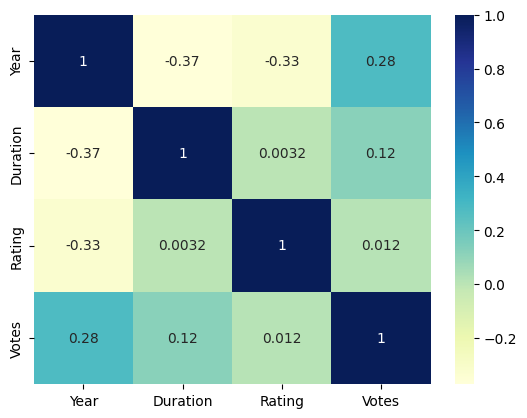

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='YlGnBu', annot=True)

In [ ]:
df=df[(df['Year']>year_low) &(df['Year']<year_upper)]
df.shape

(10088, 10)

# Model Building and Evaluation

# Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Feature Engineering

In [ ]:
X = df[['Year', 'Duration', 'Votes']]
y = (df['Rating'] >= 6).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1010
           1       0.74      0.65      0.69      1008

    accuracy                           0.71      2018
   macro avg       0.71      0.71      0.71      2018
weighted avg       0.71      0.71      0.71      2018

Confusion Matrix for Logistic Regression:
[[779 231]
 [352 656]]


# Random Forest Classifier

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1010
           1       0.93      0.91      0.92      1008

    accuracy                           0.92      2018
   macro avg       0.92      0.92      0.92      2018
weighted avg       0.92      0.92      0.92      2018

Confusion Matrix for Random Forest:
[[946  64]
 [ 90 918]]


# Confusion Matrices

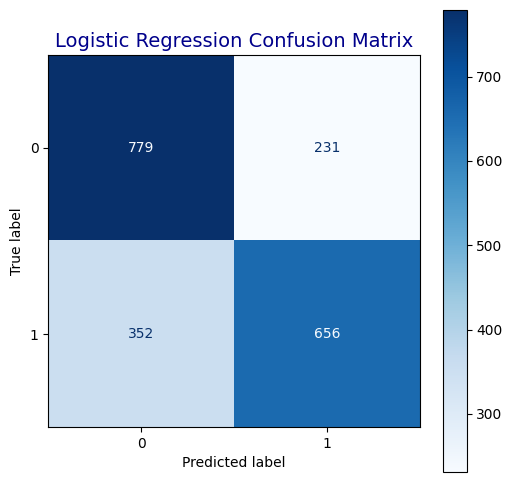

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr, ax=ax, cmap='Blues', colorbar=True
)
ax.set_title("Logistic Regression Confusion Matrix", fontsize=14, color='darkblue')
plt.show()

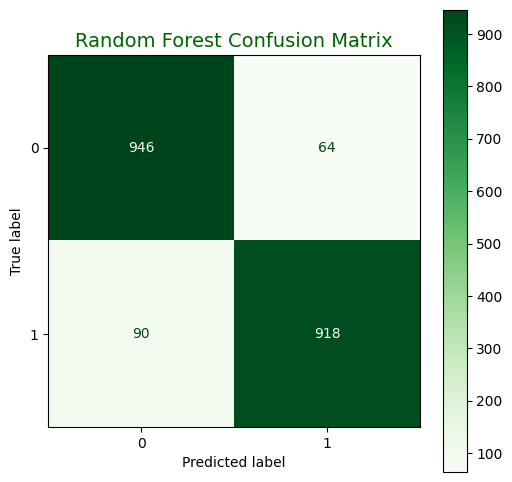

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf, ax=ax, cmap='Greens', colorbar=True
)
ax.set_title("Random Forest Confusion Matrix", fontsize=14, color='darkgreen')
plt.show()

# ROC Curve Comparison

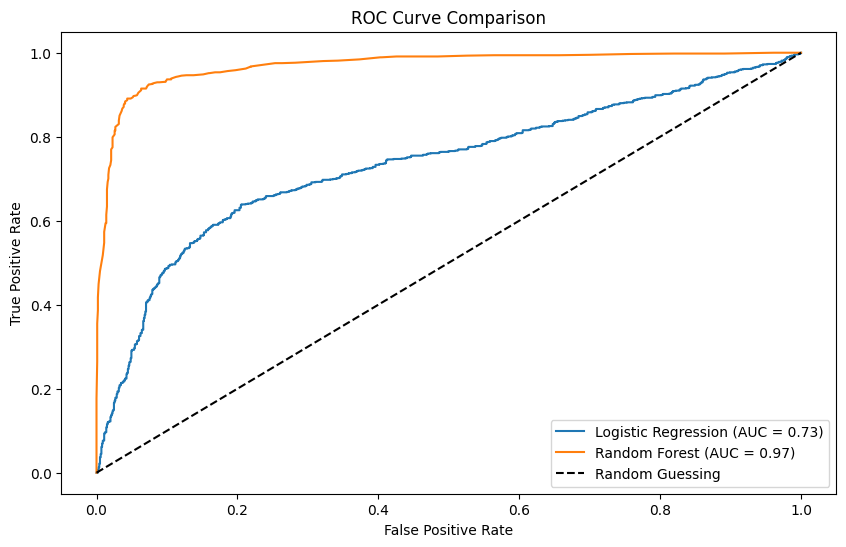

In [ ]:
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_prob_lr):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_pred_prob_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Model Performance

In [ ]:
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

if auc_rf > auc_lr:
    print("Random Forest is the best-performing model.")
else:
    print("Logistic Regression is the best-performing model.")

Random Forest is the best-performing model.
